In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/porter-delivery-time-estimation/dataset.csv


In [2]:
#import the dataset
Delivery_df=pd.read_csv('/kaggle/input/porter-delivery-time-estimation/dataset.csv')
print(Delivery_df.shape)
Delivery_df.head()

(197428, 14)


,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0


In [3]:
#info and Dtype
Delivery_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 196441 non-null  float64
 1   created_at                197428 non-null  object 
 2   actual_delivery_time      197421 non-null  object 
 3   store_id                  197428 non-null  object 
 4   store_primary_category    192668 non-null  object 
 5   order_protocol            196433 non-null  float64
 6   total_items               197428 non-null  int64  
 7   subtotal                  197428 non-null  int64  
 8   num_distinct_items        197428 non-null  int64  
 9   min_item_price            197428 non-null  int64  
 10  max_item_price            197428 non-null  int64  
 11  total_onshift_partners    181166 non-null  float64
 12  total_busy_partners       181166 non-null  float64
 13  total_outstanding_orders  181166 non-null  f

In [4]:
#summary statistics
Delivery_df.describe()

,market_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
count,196441.000000,196433.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,181166.000000,181166.000000,181166.000000
mean,2.978706,2.882352,3.196391,2682.331402,2.670791,686.218470,1159.588630,44.808093,41.739747,58.050065
std,1.524867,1.503771,2.666546,1823.093688,1.630255,522.038648,558.411377,34.526783,32.145733,52.661830
min,1.000000,1.000000,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000
25%,2.000000,1.000000,2.000000,1400.000000,1.000000,299.000000,800.000000,17.000000,15.000000,17.000000
50%,3.000000,3.000000,3.000000,2200.000000,2.000000,595.000000,1095.000000,37.000000,34.000000,41.000000
75%,4.000000,4.000000,4.000000,3395.000000,3.000000,949.000000,1395.000000,65.000000,62.000000,85.000000
max,6.000000,7.000000,411.000000,27100.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000


<AxesSubplot:xlabel='max_item_price', ylabel='store_primary_category'>

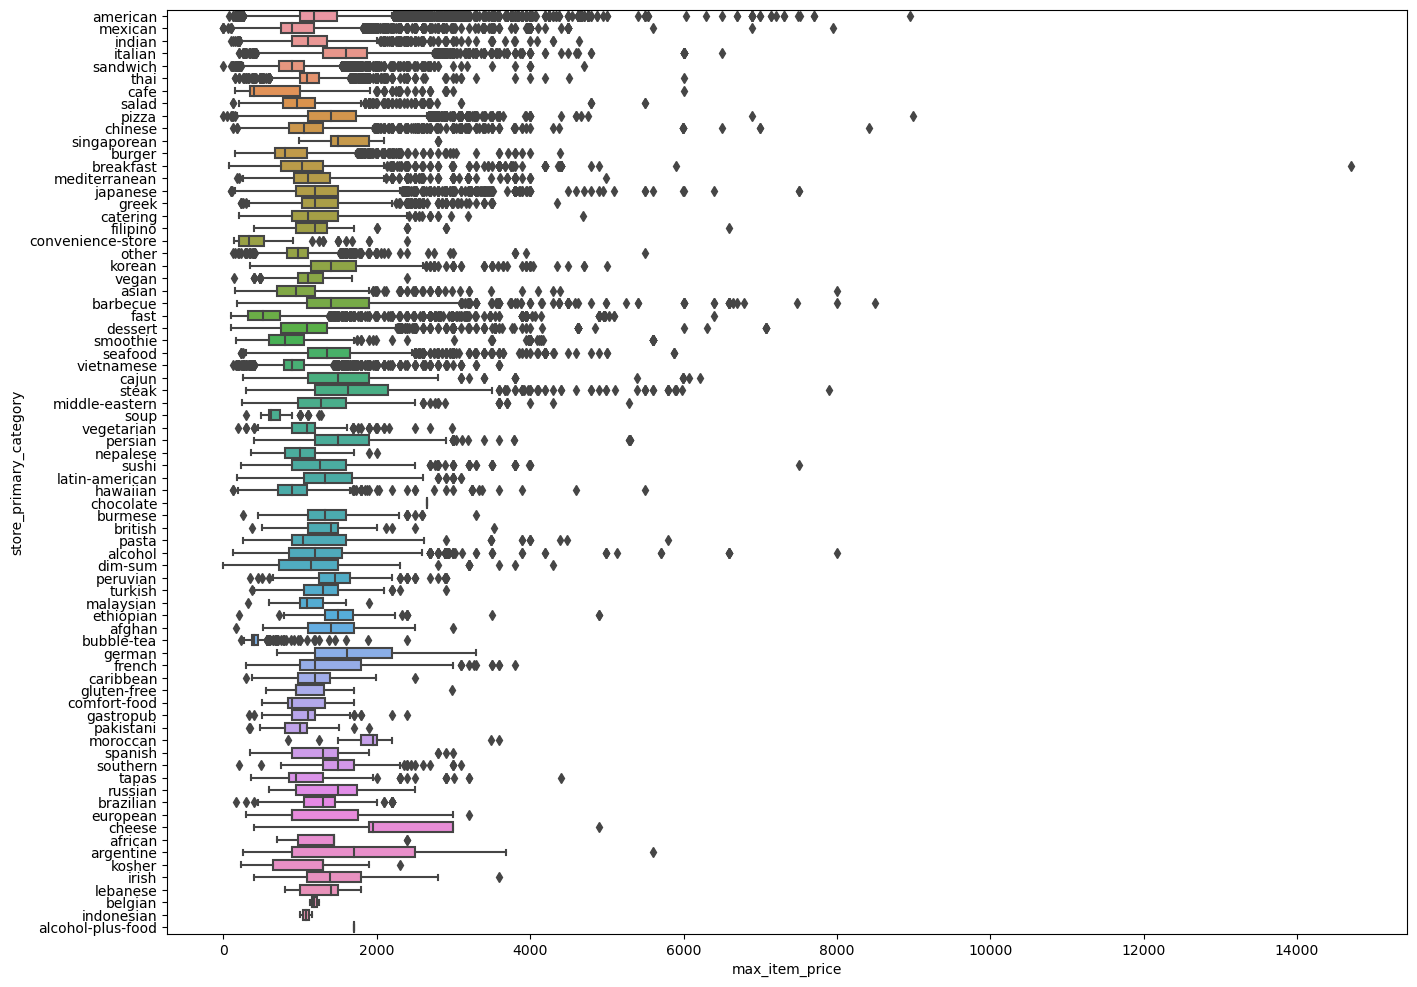

In [5]:
# boxplot for max_item_price(detecting outliers)
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16,12))
sns.boxplot(data=Delivery_df,y='store_primary_category',x='max_item_price',orient='h')
#seems to be alot of outliers

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


<AxesSubplot:xlabel='max_item_price', ylabel='Density'>

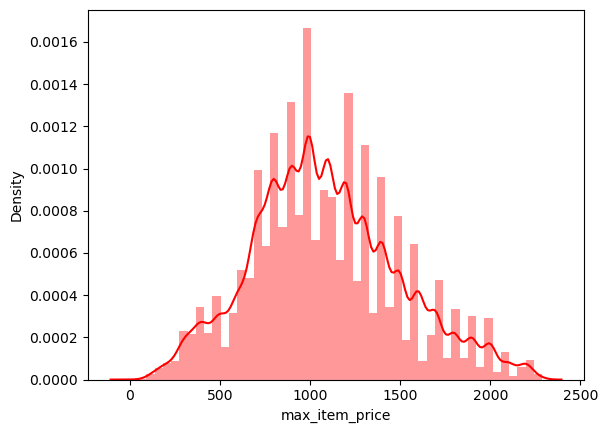

In [6]:
#dealing with max_item_price outliers
q1, q3 = np.percentile(Delivery_df['max_item_price'], [25, 75])
iqr = q3 - q1
Delivery_df=Delivery_df[(Delivery_df['max_item_price']>= q1-1.5*iqr)&(Delivery_df['max_item_price']<=q3+1.5*iqr)]
#listing.hist(column='price')
sns.distplot(Delivery_df['max_item_price'],color='r',hist_kws={'alpha': 0.4})

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


<AxesSubplot:xlabel='min_item_price', ylabel='Density'>

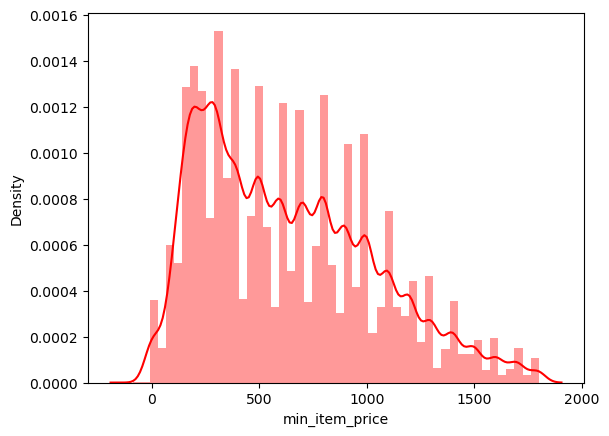

In [7]:
#dealing with min_item_price outliers
q1, q3 = np.percentile(Delivery_df['min_item_price'], [25, 75])
iqr = q3 - q1
Delivery_df=Delivery_df[(Delivery_df['min_item_price']>= q1-1.5*iqr)&(Delivery_df['min_item_price']<=q3+1.5*iqr)]
#listing.hist(column='price')
sns.distplot(Delivery_df['min_item_price'],color='r',hist_kws={'alpha': 0.4})

<AxesSubplot:xlabel='min_item_price', ylabel='store_primary_category'>

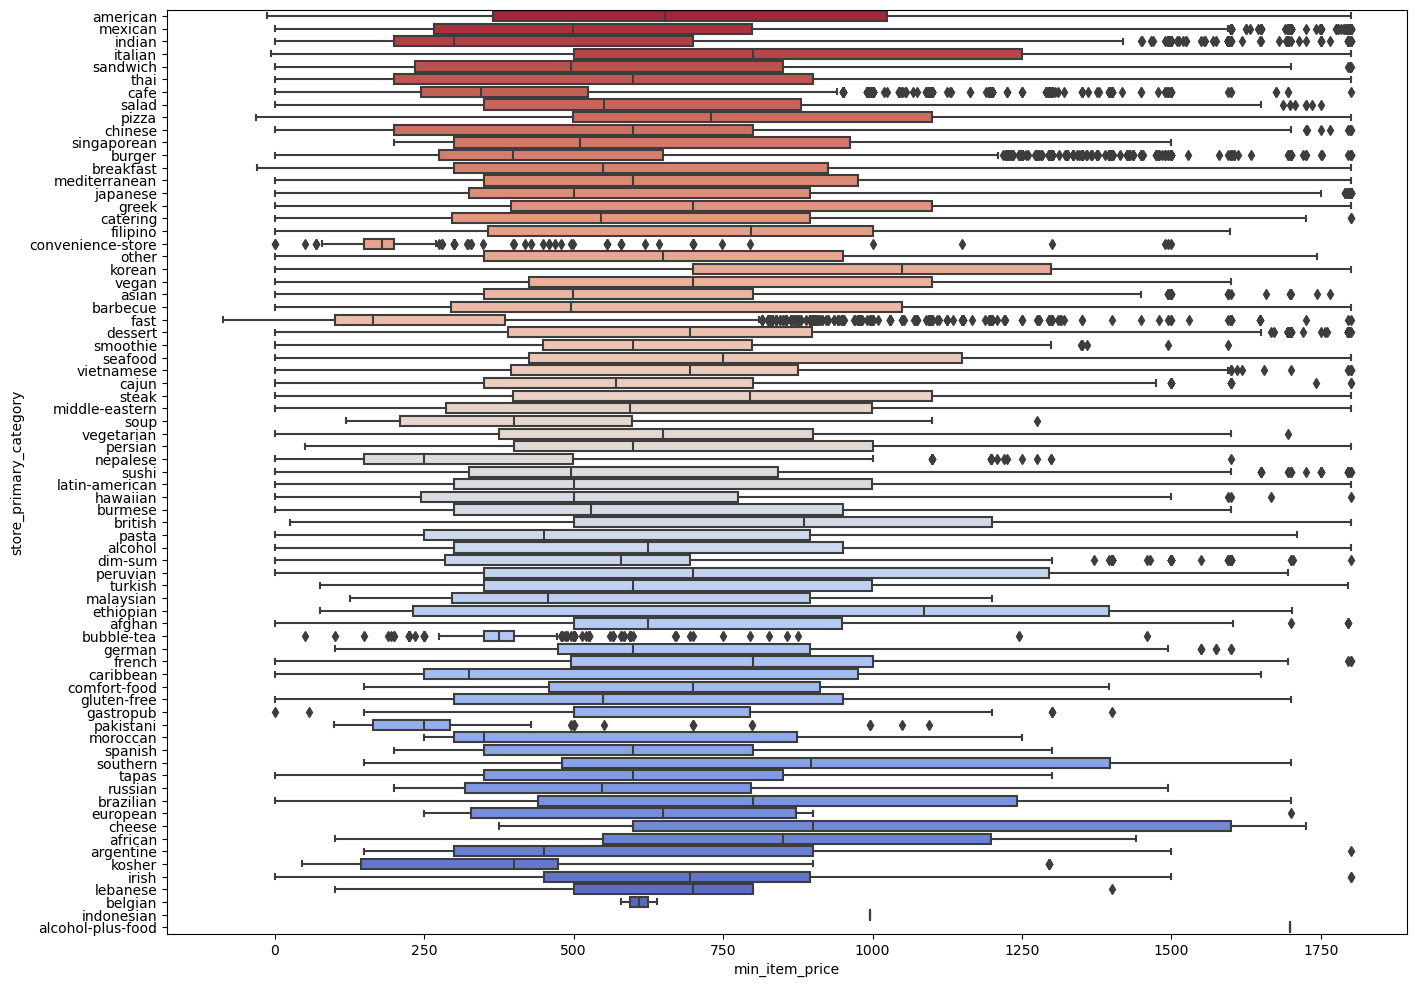

In [8]:
#Ploting min_item_price after removing outliers
plt.figure(figsize=(16,12))
sns.boxplot(data=Delivery_df,y='store_primary_category',x='min_item_price',palette='coolwarm_r')

In [9]:
#Detect categorical and numerical columns
obj=[x for x in Delivery_df.columns if Delivery_df[x].dtype=='O']
numerical=[x for x in Delivery_df.columns if Delivery_df[x].dtype!='O']
obj

['created_at', 'actual_delivery_time', 'store_id', 'store_primary_category']

2.0    51859
4.0    45211
1.0    36079
3.0    22155
5.0    17112
6.0    13643
Name: market_id, dtype: int64

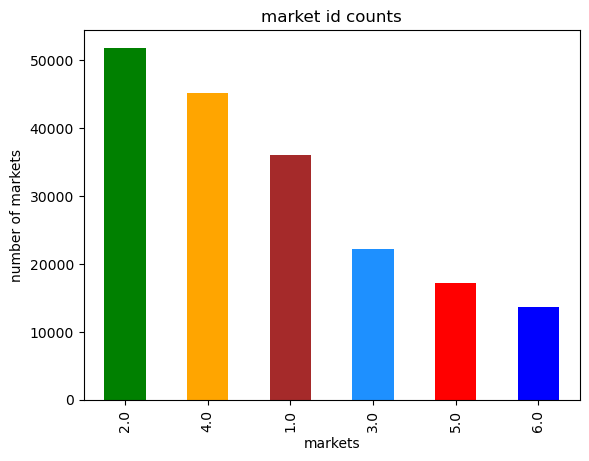

In [10]:
# Market_id counts
Delivery_df['market_id'].value_counts().plot(kind='bar',title='market id counts',xlabel='markets',ylabel='number of markets',color=['green','orange','brown','dodgerblue','red','b'])
Delivery_df['market_id'].value_counts()

In [11]:
# food categories
Delivery_df['store_primary_category'].unique()

array(['american', 'mexican', nan, 'indian', 'italian', 'sandwich',
       'thai', 'cafe', 'salad', 'pizza', 'chinese', 'singaporean',
       'burger', 'breakfast', 'mediterranean', 'japanese', 'greek',
       'catering', 'filipino', 'convenience-store', 'other', 'korean',
       'vegan', 'asian', 'barbecue', 'fast', 'dessert', 'smoothie',
       'seafood', 'vietnamese', 'cajun', 'steak', 'middle-eastern',
       'soup', 'vegetarian', 'persian', 'nepalese', 'sushi',
       'latin-american', 'hawaiian', 'burmese', 'british', 'pasta',
       'alcohol', 'dim-sum', 'peruvian', 'turkish', 'malaysian',
       'ethiopian', 'afghan', 'bubble-tea', 'german', 'french',
       'caribbean', 'comfort-food', 'gluten-free', 'gastropub',
       'pakistani', 'moroccan', 'spanish', 'southern', 'tapas', 'russian',
       'brazilian', 'european', 'cheese', 'african', 'argentine',
       'kosher', 'irish', 'lebanese', 'belgian', 'indonesian',
       'alcohol-plus-food'], dtype=object)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  # Remove the CWD from sys.path while we load stuff.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  # Remove the CWD from sys.path while we load stuff.


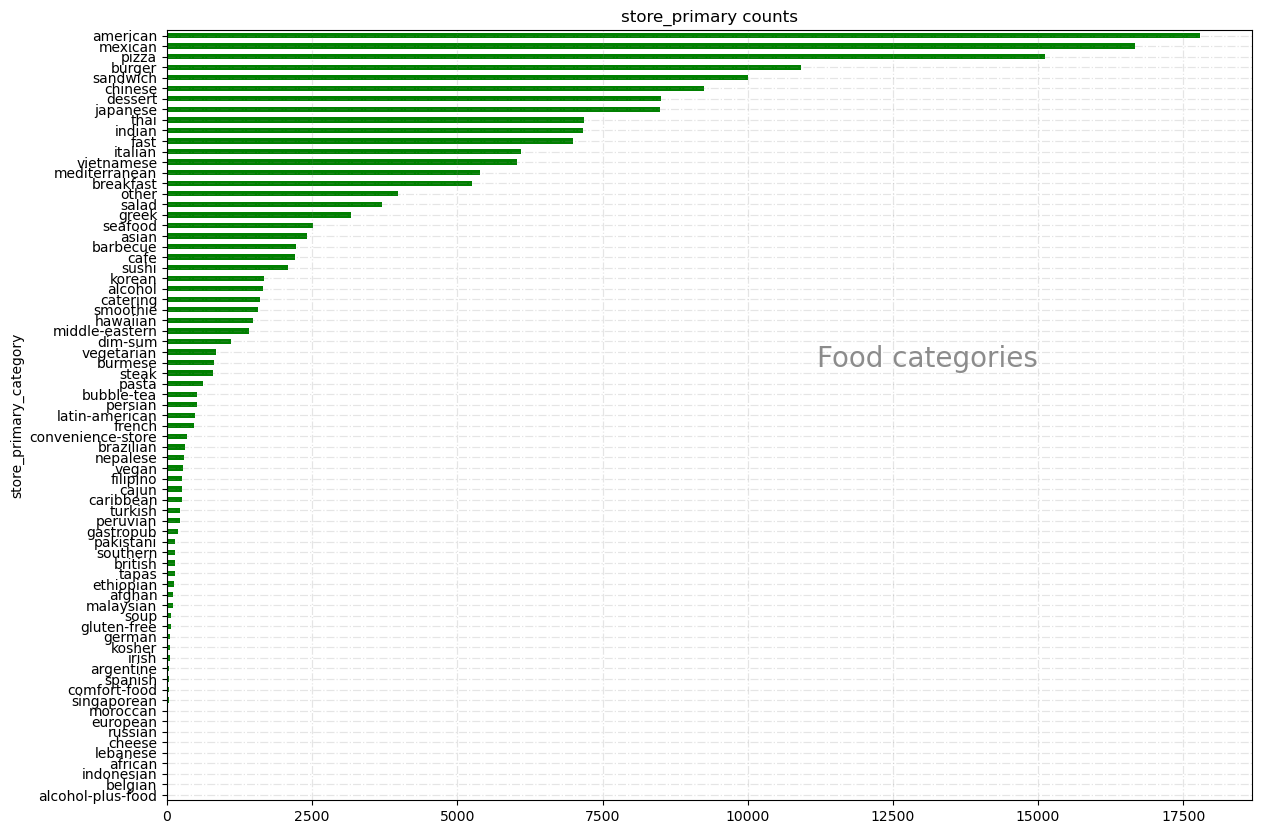

In [12]:
#food_categories barplot
import matplotlib.pyplot as plt
stores_category=Delivery_df['store_primary_category'].value_counts(ascending=True)
stores_category.plot(kind='barh',title='store_primary counts',xlabel='store_primary_category',ylabel='store_primary',color='g',figsize=(14,10))
plt.text(15000, 40, 'Food categories', fontsize = 20,
         color ='grey', ha ='right', va ='bottom',
         alpha = 0.9)
plt.grid(b = False, color ='grey',
        linestyle ='-.', linewidth = 0.9,
        alpha = 0.2)

Text(0, 0.5, 'No. of columns')

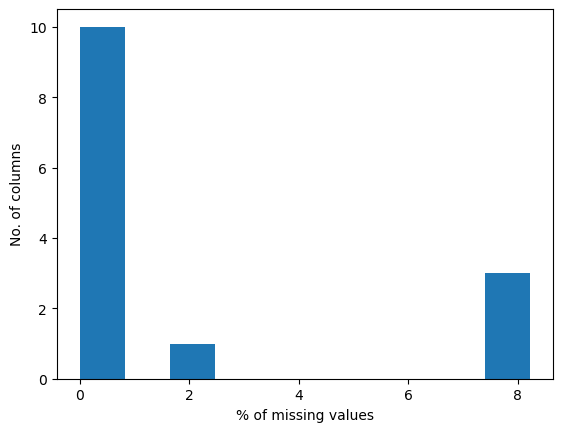

In [13]:
# percentage of null_values for each column
missing_value_prop=Delivery_df.isna().mean().sort_values(ascending=False)*100
plt.hist(missing_value_prop)
plt.xlabel('% of missing values')
plt.ylabel('No. of columns')

In [14]:
# fill null values with median for these columns  
Delivery_df['total_busy_partners'].fillna(Delivery_df['total_busy_partners'].median(),inplace=True)
Delivery_df['total_onshift_partners'].fillna(Delivery_df['total_onshift_partners'].median(),inplace=True)
Delivery_df['total_outstanding_orders'].fillna(Delivery_df['total_outstanding_orders'].median(),inplace=True)
Delivery_df[numerical].isna().sum()

market_id                   942
order_protocol              942
total_items                   0
subtotal                      0
num_distinct_items            0
min_item_price                0
max_item_price                0
total_onshift_partners        0
total_busy_partners           0
total_outstanding_orders      0
dtype: int64

In [15]:
# drop null_values from [market_id,order_protocol] since they can not be replaced
Delivery_df.dropna(inplace=True)
Delivery_df[numerical].isna().sum()

market_id                   0
order_protocol              0
total_items                 0
subtotal                    0
num_distinct_items          0
min_item_price              0
max_item_price              0
total_onshift_partners      0
total_busy_partners         0
total_outstanding_orders    0
dtype: int64

In [16]:
#calculating delivery_time
Delivery_df['created_at']=pd.to_datetime(Delivery_df['created_at'])
Delivery_df['actual_delivery_time']=pd.to_datetime(Delivery_df['actual_delivery_time'])
Delivery_df['Delivery_time']=(Delivery_df['actual_delivery_time']-Delivery_df['created_at']).dt.total_seconds()/60


In [17]:
#drop datetime columns
Delivery_df.drop(['actual_delivery_time','created_at','store_id'],axis=1,inplace=True)

In [18]:
Delivery_df.dtypes

market_id                   float64
store_primary_category       object
order_protocol              float64
total_items                   int64
subtotal                      int64
num_distinct_items            int64
min_item_price                int64
max_item_price                int64
total_onshift_partners      float64
total_busy_partners         float64
total_outstanding_orders    float64
Delivery_time               float64
dtype: object

count    181890.000000
mean         48.237269
std         333.846739
min           1.683333
25%          34.850000
50%          44.033333
75%          55.983333
max      141947.650000
Name: Delivery_time, dtype: float64


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  after removing the cwd from sys.path.


<AxesSubplot:xlabel='Delivery_time', ylabel='Density'>

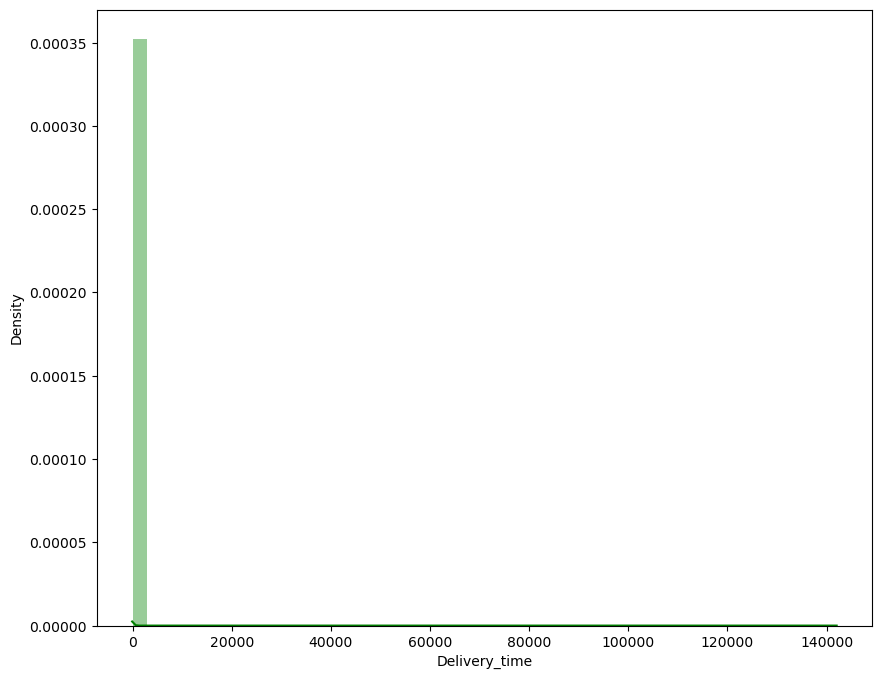

In [19]:
#showing the distribuation for the target column
print(Delivery_df['Delivery_time'].describe())
plt.figure(figsize=(10,8))
sns.distplot(Delivery_df['Delivery_time'],color='g',hist_kws={'alpha': 0.4})

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


<AxesSubplot:xlabel='Delivery_time', ylabel='Density'>

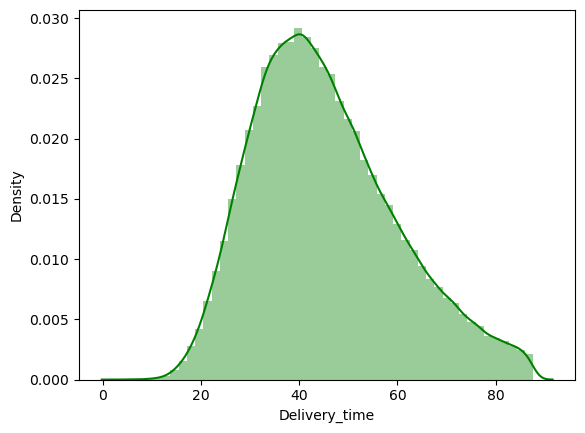

In [20]:
#dealing with outliers for the target column and showing the distribuation again
q1, q3 = np.percentile(Delivery_df['Delivery_time'], [25, 75])
iqr = q3 - q1
Delivery_df=Delivery_df[(Delivery_df['Delivery_time']>= q1-1.5*iqr)&(Delivery_df['Delivery_time']<=q3+1.5*iqr)]
#listing.hist(column='price')
sns.distplot(Delivery_df['Delivery_time'],color='g',hist_kws={'alpha': 0.4})

In [21]:
Delivery_df.columns

Index(['market_id', 'store_primary_category', 'order_protocol', 'total_items',
       'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_partners', 'total_busy_partners',
       'total_outstanding_orders', 'Delivery_time'],
      dtype='object')

<AxesSubplot:xlabel='market_id', ylabel='subtotal'>

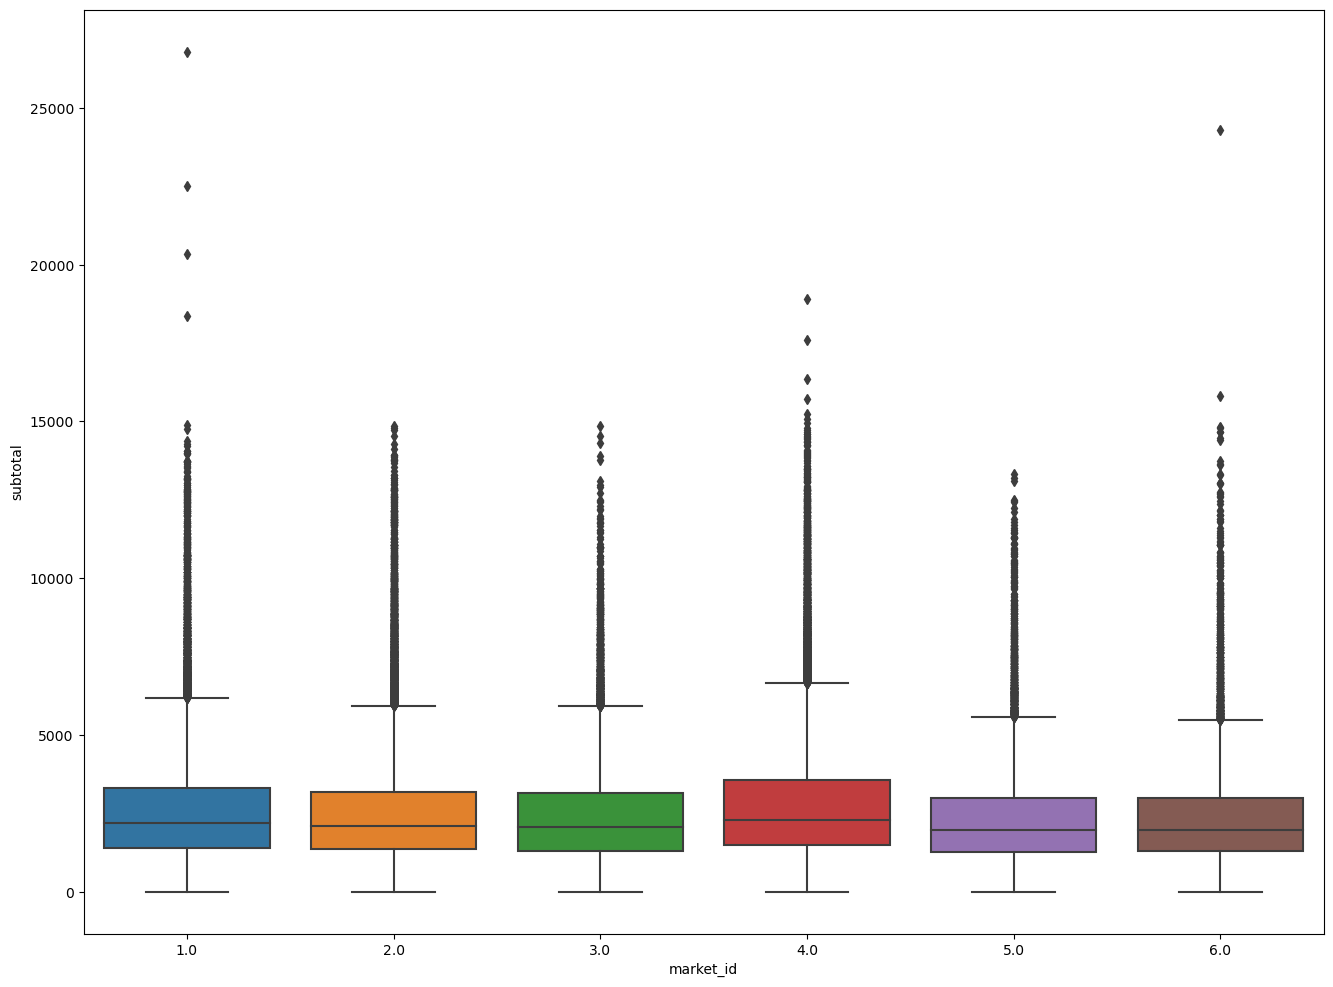

In [22]:
# showing subtotal for each market
plt.figure(figsize=(16,12))
sns.boxplot(data=Delivery_df,x='market_id',y='subtotal')

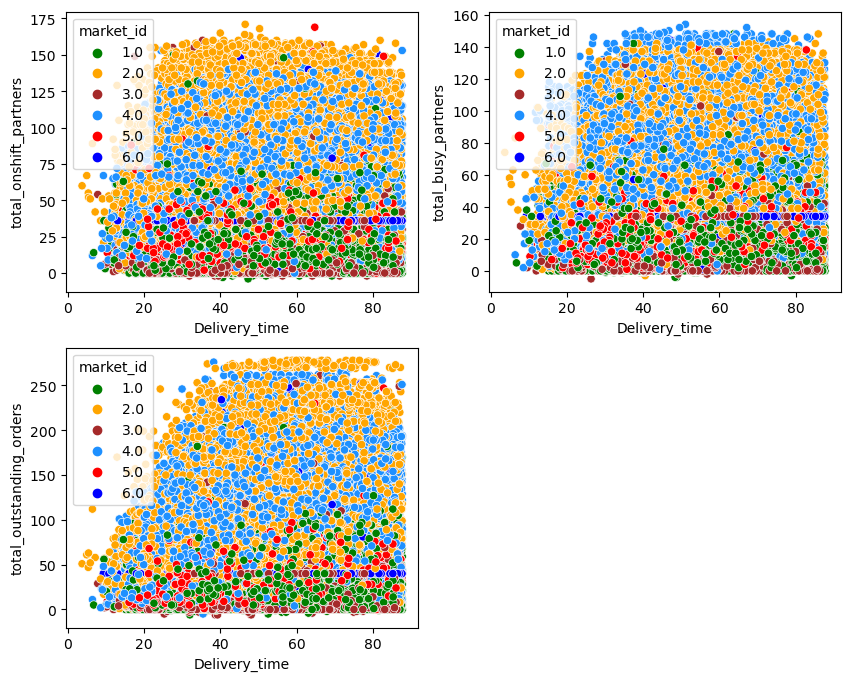

In [23]:
#Relationship between target and some features
cols=['total_onshift_partners','total_busy_partners','total_outstanding_orders']
plt.figure(figsize=(10,8))
for i , col in enumerate(cols):
    ax=plt.subplot(2,2,i+1)
    sns.scatterplot(data=Delivery_df,x='Delivery_time',y=col,ax=ax, hue='market_id',palette=['green','orange','brown','dodgerblue','red','b'])

In [24]:
y=Delivery_df['Delivery_time']
X=Delivery_df.drop('Delivery_time',axis=1)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [25]:
from sklearn.preprocessing import OneHotEncoder
cat_cols = ['store_primary_category','market_id']
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
X_train_encoded = pd.DataFrame(encoder.fit_transform(X_train[cat_cols]))
X_test_encoded = pd.DataFrame(encoder.transform(X_test[cat_cols]))
X_train_encoded.index = X_train.index
X_test_encoded.index = X_test.index
X_train_num = X_train.drop(cat_cols, axis=1)
X_test_num = X_test.drop(cat_cols, axis=1)
X_train= pd.concat([X_train_num, X_train_encoded], axis=1)
X_test = pd.concat([X_test_num, X_test_encoded], axis=1)

In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,r2_score
rf=RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [27]:
from sklearn.metrics import mean_squared_error
print(' mean absolute error :{}'.format(mean_absolute_error(y_test,y_pred)))
print(' r2_score :{}'.format(r2_score(y_test,y_pred)))
mse=mean_squared_error(y_test,y_pred)
print(' mean squared error {}'.format(mse))
print(' root mean squared error {}'.format(np.sqrt(mse)))

 mean absolute error :10.284343666659002
 r2_score :0.21731935799927893
 mean squared error 169.3906044905815
 root mean squared error 13.015014578961543


           Actual  Predicted
37968   57.966667  62.593333
8151    35.866667  40.674667
120413  32.966667  40.441333
109975  44.850000  48.869833
11572   29.400000  34.282500
176913  41.816667  53.811667
40083   39.783333  48.602931
34872   68.666667  53.682667
90029   45.983333  46.733667
133568  30.300000  47.006444
47687   65.950000  57.047000
187928  31.750000  36.479667
147154  72.050000  46.776783
18410   39.283333  42.681000
138618  35.366667  40.330500
79108   39.050000  44.152167
112780  45.750000  43.954000
179911  38.966667  40.519056
41478   29.083333  39.427833
53922   42.883333  43.497500
92274   36.283333  42.659667
64845   41.500000  37.678500
10926   47.700000  38.104000
187999  47.283333  35.615333
58813   51.133333  59.159333


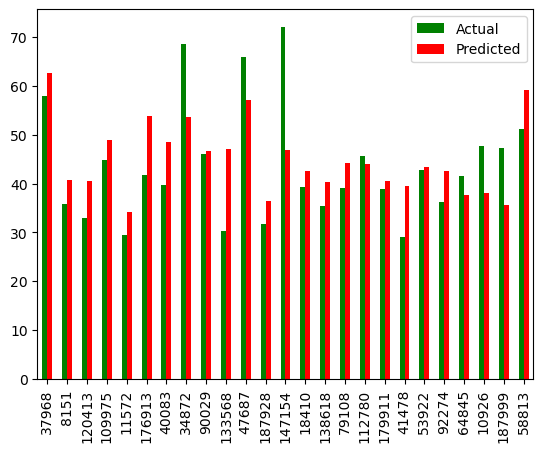

In [34]:
df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
graph=df.sample(25)
graph.plot(kind='bar',color=['green','red'] )
print(graph)

In [29]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred1=lr.predict(X_test)


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [30]:
from sklearn.metrics import mean_squared_error
print(' mean absolute error :{}'.format(mean_absolute_error(y_test,y_pred1)))
print(' r2_score :{}'.format(r2_score(y_test,y_pred1)))
mse=mean_squared_error(y_test,y_pred1)
print(' mean squared error {}'.format(mse))
print(' root mean squared error {}'.format(np.sqrt(mse)))

 mean absolute error :10.566760005508637
 r2_score :0.18529093238565342
 mean squared error 176.32231339512938
 root mean squared error 13.278641248076905


In [31]:
#view feature importances
df={'features names':np.array(X_train.columns),'features importance':np.array(rf.feature_importances_)}
data=pd.DataFrame(df)
data[data['features importance']>=0.01]

,features names,features importance
0,order_protocol,0.038919
1,total_items,0.023825
2,subtotal,0.170968
3,num_distinct_items,0.023946
4,min_item_price,0.101367
5,max_item_price,0.104277
6,total_onshift_partners,0.109710
7,total_busy_partners,0.075458
8,total_outstanding_orders,0.157273
12,3,0.010017


<AxesSubplot:ylabel='features names'>

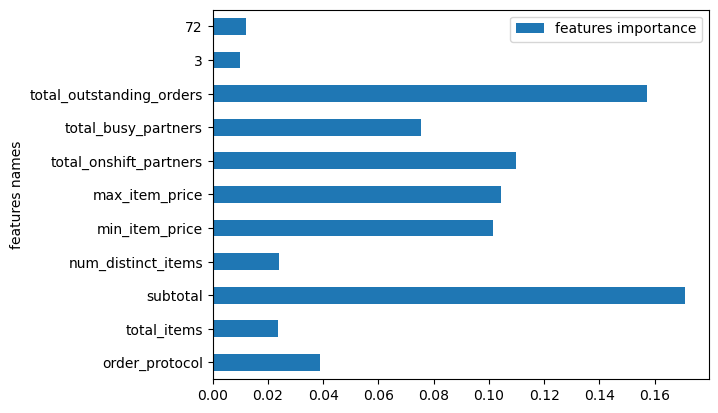

In [32]:
#Visualize feature importance
data[data['features importance']>=0.01].plot(kind='barh',x='features names',y='features importance')